In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk

In [3]:
os.getcwd()

'C:\\Users\\liisa\\Bootcamp\\Bootcamp 1\\Projects\\Project 6 - NLP on Book Reviews'

In [3]:
os.chdir('C:\\Users\\liisa\\Bootcamp\\Bootcamp 1\\Projects\\Project 6 - NLP on Book Reviews')

In [4]:
df = pd.read_csv('Books_rating.csv')

In [5]:
df.shape

(3000000, 10)

In [6]:
df = df.dropna(subset=['Title', 'review/text'])

In [7]:
df.drop_duplicates(keep="first",inplace=True)

In [8]:
df.reset_index(inplace=True)

In [9]:
sample = df.sample(5000)

In [10]:
df = df.drop(sample.index)

In [11]:
sample.to_csv("sample_for_testing.csv", index=False)

In [12]:
sample.shape

(5000, 11)

In [101]:
hemingway = df[df['Title'].str.contains('Sun Also Rises')]

In [102]:
hemingway.reset_index(inplace=True)

In [105]:
drinking = hemingway[hemingway['review/text'].str.contains('drinking')]

In [110]:
example_3 = drinking['review/text'][14]


In [227]:
example_5 = "'This is a good place,' he said.  'There's a lot of liquor,' I agreed."

In [228]:
sia.polarity_scores(example_5)

{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.6124}

In [111]:
sia.polarity_scores(example_3)

{'neg': 0.098, 'neu': 0.832, 'pos': 0.071, 'compound': -0.7536}

In [112]:
encoded_text = tokenizer(example_3, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.38346878, 'roberta_neu': 0.47150895, 'roberta_pos': 0.14502227}


In [229]:
encoded_text = tokenizer(example_5, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.02067024, 'roberta_neu': 0.16716263, 'roberta_pos': 0.8121671}


In [13]:
sample.reset_index(inplace=True)

<AxesSubplot:>

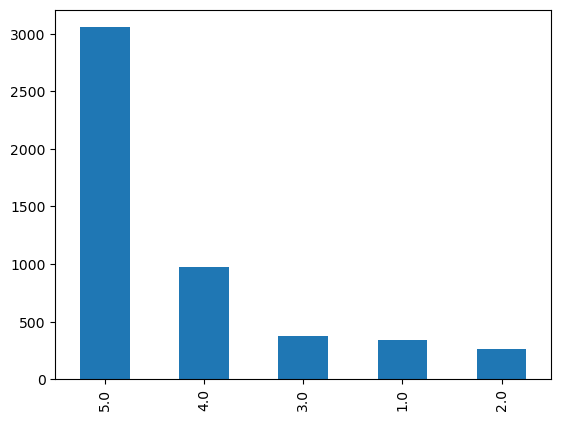

In [14]:
sample['review/score'].value_counts().plot(kind='bar')

In [15]:
sample_scores = sample.groupby('review/score')['Id'].count()
sample_scores = sample_scores.to_frame()
sample_scores.reset_index(inplace=True)

In [3]:
colors = ["#0066cc","#009999","#666633",'#666699','#336600','#996633']
sns.set_palette(sns.color_palette(colors))

In [4]:
sns.color_palette()

[(0.0, 0.4, 0.8),
 (0.0, 0.6, 0.6),
 (0.4, 0.4, 0.2),
 (0.4, 0.4, 0.6),
 (0.2, 0.4, 0.0),
 (0.6, 0.4, 0.2)]

In [18]:
sample_scores

,review/score,Id
0,1.0,338
1,2.0,258
2,3.0,378
3,4.0,970
4,5.0,3056


Text(0.5, 0, 'Rating')

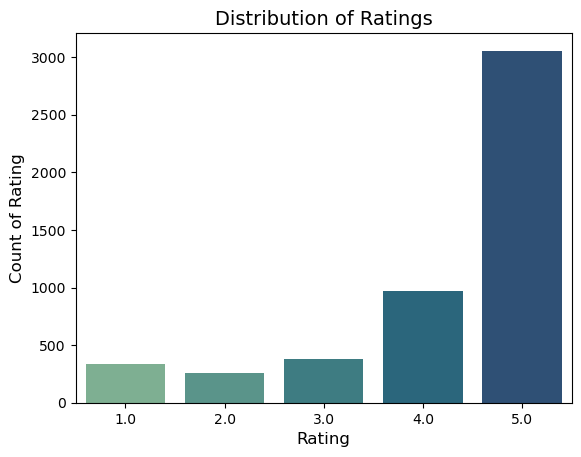

In [19]:
sns.barplot(data=sample_scores, x='review/score',y='Id', palette='crest')
plt.title('Distribution of Ratings', fontsize=14)
plt.ylabel("Count of Rating", fontsize=12,loc="center")
plt.xlabel("Rating", fontsize=12, loc="center")


In [20]:
example = sample['review/text'][50]
example

"Flatland is a story of A Square living in a two dimensional land called Flatland. One day he discovers that another dimension exists and it changes his life. This 19th century classic is not only an explanation of dimensions, but it is also a social commentary on Victorian England. I was disappointed in this story. I was looking forward to an interesting look at geometry and dimensions, but mostly I was bored, especially with the first half of the book. I had to repeatedly remind myself that it was social commentary and that the horrible description of women may have been commentary and not the author's real feelings. If you are interested in a way of viewing dimensions, the second half of the book might interest you, but as a whole I wish I skipped this one."

In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\liisa\AppData\Roaming\nltk_data...


True

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [22]:
sia.polarity_scores(example)

{'neg': 0.08, 'neu': 0.818, 'pos': 0.102, 'compound': 0.4767}

In [25]:
example_2 = sample['review/text'][4]
example_2

"Finally, a voice of reason in the postmodern philosophical\\theological quagmire. Lints (contra James McClendon and Nancey Murphy)does not fall prey to the tacit dynamics of ultramodernity with its ubiqitous and almost irresistable &quot;pull&quot; to ignore - if not deny - the God given fact of ontology. He not only resists the lure of such delusional epistemelogical &quot;levitation&quot; but navigates falicitously the perichoretic divine design of Scripture, culture, reason, and tradition, as all indispensible elements of the Orthodox (yet insuperably informed)modern\\postmodern theological project. If I am not mistaken, this is his first excursion into the book publishing arena but with an almost uncanny intuitive savvy he has managed to fire an incredibly trenchant,concise, and cogent Evangelical &quot;salvo&quot; across the bow of the profferings of most of the more majesterial construals of the so called avant garde postmodern theologies. For any aspiring Evangelical thinkers, 

In [26]:
sia.polarity_scores(example_2)

{'neg': 0.02, 'neu': 0.803, 'pos': 0.176, 'compound': 0.9936}

In [27]:
res = {}
for i, row in tqdm(sample.iterrows(), total=len(sample)):
    text = row['review/text']
    myid = row['index']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [28]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'index'})
vaders = vaders.merge(sample, how='left')

In [29]:
vaders.iloc[[50]]

,index,neg,neu,pos,compound,level_0,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
50,1310901,0.08,0.818,0.102,0.4767,1306330,B0006ATOUG,"Flatland: A romance of many dimensions,",NaN,A3DO91H50H1J3Y,Cora Rosenhaft,1/3,2.0,1320710400,Flatland,Flatland is a story of A Square living in a tw...


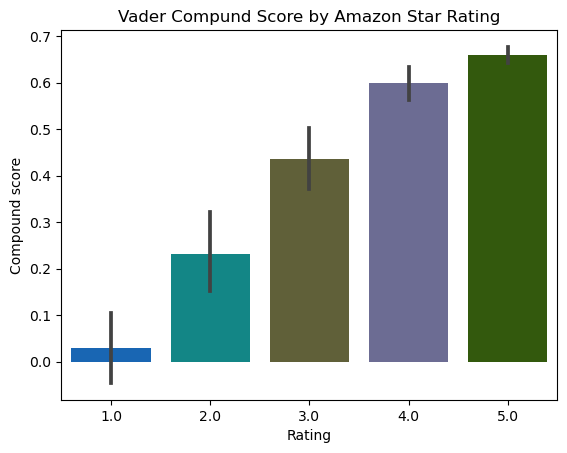

In [77]:
ax = sns.barplot(data=vaders, x='review/score', y='compound')
ax.set_title('Vader Compund Score by Amazon Star Rating')
ax.set_ylabel('Compound score')
ax.set_xlabel('Rating')
plt.savefig('vader_scores.png',bbox_inches='tight')

plt.show()



In [31]:
vaders.head()

,index,neg,neu,pos,compound,level_0,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1806125,0.159,0.704,0.136,-0.8352,1800257,0312055269,"Unanswered Cries: A True Story of Friends, Nei...",NaN,A1SBS23684LNLS,"Becky Agronow ""Sugar Mommy""",0/0,4.0,1359763200,Oddly disturbing ...,This book was skillfully written. The writer p...
1,2374741,0.000,0.482,0.518,0.9665,2367464,B000OTWOTC,Scaling the Ivy Wall in the `90's : Twelve Ess...,NaN,A16PBJIFF00ENN,zentriton,0/0,4.0,1359417600,Good book,This book is pretty well written and really he...
2,756133,0.031,0.780,0.189,0.8888,753602,B0006APKUO,Rebecca,NaN,A7BMB7TVNQAE4,"""cenedra11""",0/1,5.0,1029628800,Rebecca,The fact that we never find out (or I never no...
3,1621600,0.000,0.822,0.178,0.8398,1616199,1585475696,A Place Called Wiregrass,NaN,NaN,NaN,2/2,5.0,1032393600,TRUE SOUTH - down to the Detail,"I am a southerner through and through, and thi..."
4,1848390,0.020,0.803,0.176,0.9936,1842425,157910326X,The Fabric of Theology: A Prolegomenon to Evan...,NaN,NaN,NaN,20/40,5.0,931564800,Getting Started on the Right Foot,"Finally, a voice of reason in the postmodern p..."


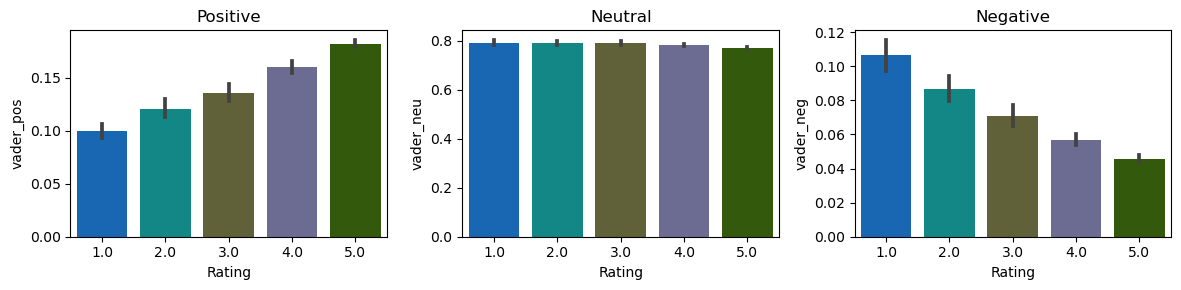

In [81]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='review/score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='review/score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='review/score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[0].set_ylabel('vader_pos')
axs[1].set_ylabel('vader_neu')
axs[2].set_ylabel('vader_neg')
axs[0].set_xlabel('Rating')
axs[1].set_xlabel('Rating')
axs[2].set_xlabel('Rating')
plt.tight_layout()
plt.savefig('vader_scores_all.png',bbox_inches='tight')

plt.show()

<AxesSubplot:xlabel='compound', ylabel='pos'>

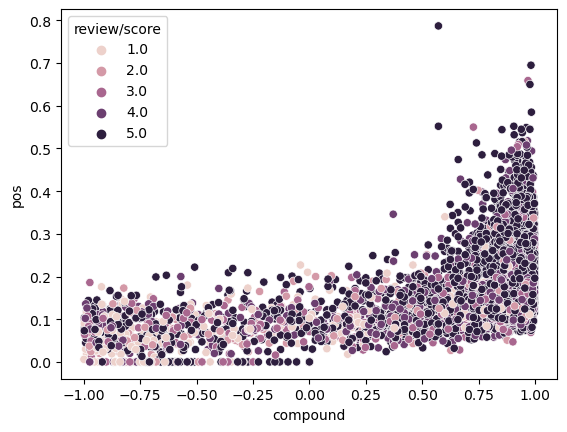

In [33]:
sns.scatterplot(data=vaders, x='compound', y='pos', hue='review/score')



In [9]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [34]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [12]:
!pip install torch

     ------------------------------------- 162.5/162.5 MB 10.9 MB/s eta 0:00:00


In [35]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [36]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Flatland is a story of A Square living in a two dimensional land called Flatland. One day he discovers that another dimension exists and it changes his life. This 19th century classic is not only an explanation of dimensions, but it is also a social commentary on Victorian England. I was disappointed in this story. I was looking forward to an interesting look at geometry and dimensions, but mostly I was bored, especially with the first half of the book. I had to repeatedly remind myself that it was social commentary and that the horrible description of women may have been commentary and not the author's real feelings. If you are interested in a way of viewing dimensions, the second half of the book might interest you, but as a whole I wish I skipped this one.


{'neg': 0.08, 'neu': 0.818, 'pos': 0.102, 'compound': 0.4767}

In [37]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)



{'roberta_neg': 0.8493112, 'roberta_neu': 0.13116853, 'roberta_pos': 0.01952031}


In [38]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [39]:
res = {}
for i, row in tqdm(sample.iterrows(), total=len(sample)):
    try:
        text = row['review/text']
        myid = row['index']
        res[myid] = polarity_scores_roberta(text)
    except RuntimeError:
        print(f'Broke for id {myid}')
    except IndexError:
        print(f'Broke for id {myid}')

  0%|          | 0/5000 [00:00<?, ?it/s]

Broke for id 638777
Broke for id 1817736
Broke for id 1220731
Broke for id 1808117
Broke for id 1492769
Broke for id 190767
Broke for id 1164815
Broke for id 2003461
Broke for id 994
Broke for id 1744563
Broke for id 565526
Broke for id 764159
Broke for id 2382377
Broke for id 2110410
Broke for id 2331532
Broke for id 1315023
Broke for id 2550591
Broke for id 214329
Broke for id 848478
Broke for id 2517889
Broke for id 2531093
Broke for id 220767
Broke for id 1724154
Broke for id 1319044
Broke for id 586007
Broke for id 1002018
Broke for id 2802339
Broke for id 2546103
Broke for id 1329740
Broke for id 300853
Broke for id 976376
Broke for id 153900
Broke for id 2712162
Broke for id 85914
Broke for id 1106921
Broke for id 693541
Broke for id 2233767
Broke for id 127242
Broke for id 315223
Broke for id 1139860
Broke for id 1320034
Broke for id 2618207
Broke for id 2563555
Broke for id 2248364
Broke for id 2107441
Broke for id 1114306
Broke for id 1301421
Broke for id 487524
Broke for id 

In [40]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'index'})
results_df = results_df.merge(vaders, how='left')

In [41]:
results_df.columns

Index(['index', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'neg', 'neu',
       'pos', 'compound', 'level_0', 'Id', 'Title', 'Price', 'User_id',
       'profileName', 'review/helpfulness', 'review/score', 'review/time',
       'review/summary', 'review/text'],
      dtype='object')

In [42]:
results_df.head()

,index,roberta_neg,roberta_neu,roberta_pos,neg,neu,pos,compound,level_0,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1806125,0.328739,0.380488,0.290773,0.159,0.704,0.136,-0.8352,1800257,0312055269,"Unanswered Cries: A True Story of Friends, Nei...",NaN,A1SBS23684LNLS,"Becky Agronow ""Sugar Mommy""",0/0,4.0,1359763200,Oddly disturbing ...,This book was skillfully written. The writer p...
1,2374741,0.001405,0.015813,0.982782,0.000,0.482,0.518,0.9665,2367464,B000OTWOTC,Scaling the Ivy Wall in the `90's : Twelve Ess...,NaN,A16PBJIFF00ENN,zentriton,0/0,4.0,1359417600,Good book,This book is pretty well written and really he...
2,756133,0.021864,0.056612,0.921524,0.031,0.780,0.189,0.8888,753602,B0006APKUO,Rebecca,NaN,A7BMB7TVNQAE4,"""cenedra11""",0/1,5.0,1029628800,Rebecca,The fact that we never find out (or I never no...
3,1621600,0.033388,0.231788,0.734823,0.000,0.822,0.178,0.8398,1616199,1585475696,A Place Called Wiregrass,NaN,NaN,NaN,2/2,5.0,1032393600,TRUE SOUTH - down to the Detail,"I am a southerner through and through, and thi..."
4,1848390,0.025040,0.553567,0.421392,0.020,0.803,0.176,0.9936,1842425,157910326X,The Fabric of Theology: A Prolegomenon to Evan...,NaN,NaN,NaN,20/40,5.0,931564800,Getting Started on the Right Foot,"Finally, a voice of reason in the postmodern p..."


In [43]:
results_df.rename(columns={'neg': 'vader_neg', 'neu': 'vader_neu', 'pos':'vader_pos'}, inplace=True)

In [44]:
results_df.rename(columns={'compound': 'vader_compound'}, inplace=True)

In [45]:
results_df.head()

,index,roberta_neg,roberta_neu,roberta_pos,vader_neg,vader_neu,vader_pos,vader_compound,level_0,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1806125,0.328739,0.380488,0.290773,0.159,0.704,0.136,-0.8352,1800257,0312055269,"Unanswered Cries: A True Story of Friends, Nei...",NaN,A1SBS23684LNLS,"Becky Agronow ""Sugar Mommy""",0/0,4.0,1359763200,Oddly disturbing ...,This book was skillfully written. The writer p...
1,2374741,0.001405,0.015813,0.982782,0.000,0.482,0.518,0.9665,2367464,B000OTWOTC,Scaling the Ivy Wall in the `90's : Twelve Ess...,NaN,A16PBJIFF00ENN,zentriton,0/0,4.0,1359417600,Good book,This book is pretty well written and really he...
2,756133,0.021864,0.056612,0.921524,0.031,0.780,0.189,0.8888,753602,B0006APKUO,Rebecca,NaN,A7BMB7TVNQAE4,"""cenedra11""",0/1,5.0,1029628800,Rebecca,The fact that we never find out (or I never no...
3,1621600,0.033388,0.231788,0.734823,0.000,0.822,0.178,0.8398,1616199,1585475696,A Place Called Wiregrass,NaN,NaN,NaN,2/2,5.0,1032393600,TRUE SOUTH - down to the Detail,"I am a southerner through and through, and thi..."
4,1848390,0.025040,0.553567,0.421392,0.020,0.803,0.176,0.9936,1842425,157910326X,The Fabric of Theology: A Prolegomenon to Evan...,NaN,NaN,NaN,20/40,5.0,931564800,Getting Started on the Right Foot,"Finally, a voice of reason in the postmodern p..."


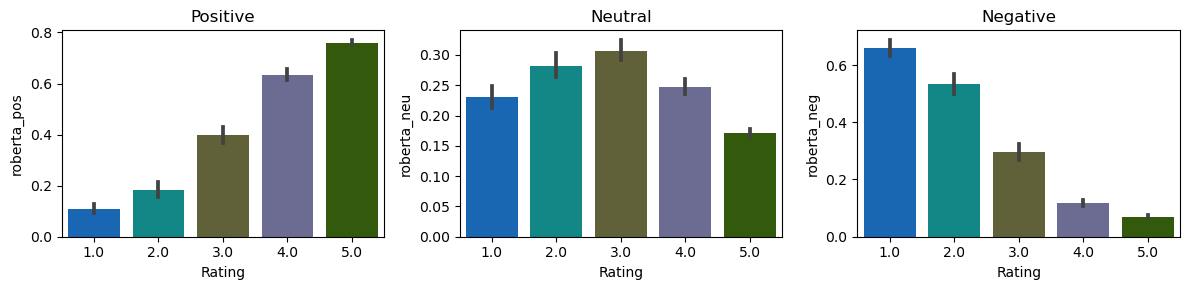

In [79]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=results_df, x='review/score', y='roberta_pos', ax=axs[0])
sns.barplot(data=results_df, x='review/score', y='roberta_neu', ax=axs[1])
sns.barplot(data=results_df, x='review/score', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[0].set_xlabel('Rating')
axs[1].set_xlabel('Rating')
axs[2].set_xlabel('Rating')
plt.tight_layout()
plt.savefig('roberta_scores.png',bbox_inches='tight')
plt.show()

In [47]:
results_df.to_csv("sa_results.csv", index=False)

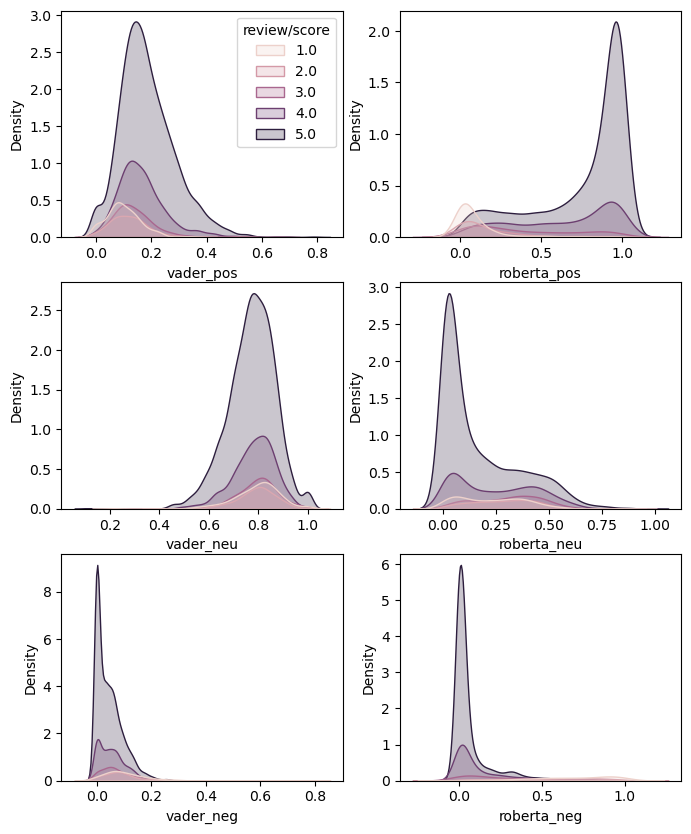

In [100]:
fig, axs = plt.subplots(3, 2, figsize=(8, 10))

sns.kdeplot(data=results_df, x='vader_pos', hue='review/score', fill=True, ax=axs[0][0])
sns.kdeplot(data=results_df, x='roberta_pos', hue='review/score', fill=True, legend = False, ax=axs[0][1])
sns.kdeplot(data=results_df, x='vader_neu', hue='review/score', fill=True, legend = False, ax=axs[1][0])
sns.kdeplot(data=results_df, x='roberta_neu', hue='review/score', fill=True, legend = False, ax=axs[1][1])
sns.kdeplot(data=results_df, x='vader_neg', hue='review/score', fill=True, legend = False, ax=axs[2][0])
sns.kdeplot(data=results_df, x='roberta_neg', hue='review/score', fill=True, legend = False, ax=axs[2][1])

plt.savefig('vader_rob_comp.png',bbox_inches='tight')
plt.show()


<AxesSubplot:xlabel='roberta_pos', ylabel='Density'>

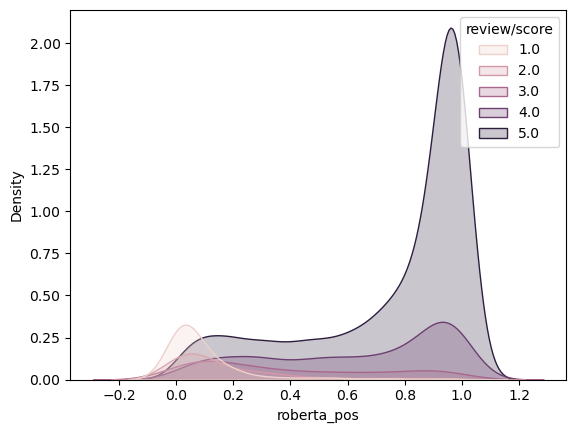

In [87]:
sns.kdeplot(data=results_df, x='roberta_pos', hue='review/score', fill=True)

<AxesSubplot:xlabel='roberta_pos', ylabel='vader_pos'>

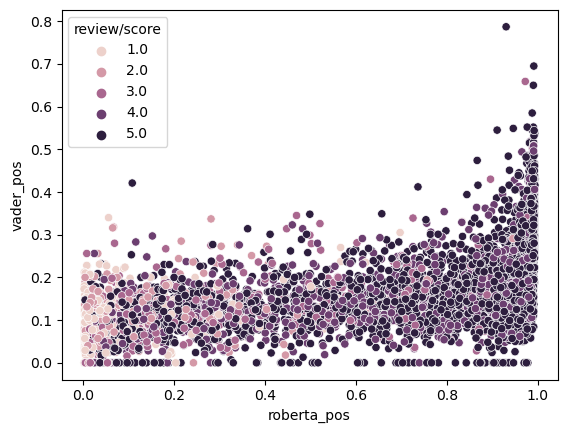

In [49]:
sns.scatterplot(data=results_df, x='roberta_pos', y='vader_pos', hue='review/score')

<AxesSubplot:xlabel='roberta_neg', ylabel='vader_neg'>

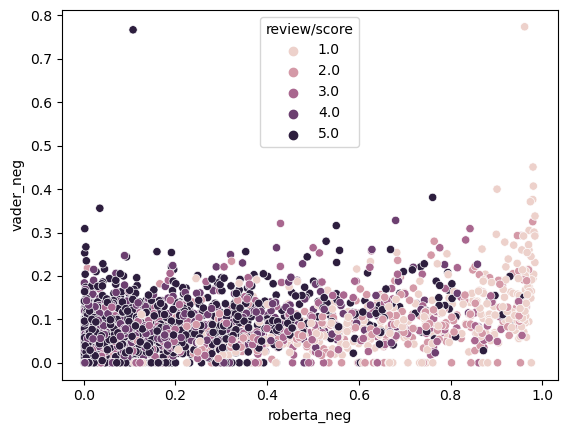

In [76]:
sns.scatterplot(data=results_df, x='roberta_neg', y='vader_neg', hue='review/score')

In [50]:
results_df['review/score'].value_counts()

5.0    2898
4.0     889
3.0     352
1.0     327
2.0     240
Name: review/score, dtype: int64

In [140]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")



No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\liisa\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\liisa\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [56]:
robert_neg = results_df.loc[(results_df['review/score'] == 5) & (results_df['roberta_neg'] > .5 )]

robert_neg.sort_values(by = 'roberta_neg', ascending=False)

,index,roberta_neg,roberta_neu,roberta_pos,vader_neg,vader_neu,vader_pos,vader_compound,level_0,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
3612,2414347,0.960079,0.035553,0.004368,0.151,0.702,0.147,-0.1336,2406844,B0009MK6US,Savage Inequalities: Children in America's Sch...,NaN,A1PPBROC21K0W,CMoore,2/5,5.0,1305244800,Savage Inequalities: My opinon,Jonathan Kozol did an outstanding job writing ...
539,788717,0.940244,0.053677,0.006080,0.095,0.733,0.172,0.2023,786118,1580495974,A Tale of Two Cities - Literary Touchstone Edi...,5.99,A2JD9Y3FNZJ7K9,Cindy,0/0,5.0,1361577600,Tale of Two Cities,I did not order or receive this product. There...
1744,2904924,0.929365,0.064159,0.006476,0.199,0.715,0.085,-0.9927,2896165,1401911498,Left to Tell: Discovering God Amidst The Rwand...,17.48,A3RJCWDD61QTDX,Rachel F,0/0,5.0,1350691200,Must read,"This book was incredibly disturbing, and readi..."
39,1992132,0.923685,0.069978,0.006336,0.121,0.879,0.000,-0.5106,1985821,0944092691,Without Sanctuary: Lynching Photography in Ame...,37.80,AKANFU5EKAD0G,Ravman,4/4,5.0,1262995200,VERY DISTURBING,A very visually and mentally disturbing book. ...
2658,20065,0.913807,0.074111,0.012082,0.111,0.813,0.077,-0.3687,20017,B000I3JBUO,One Hundred Years of Solitude,NaN,A1GCRD5SNP0QS3,C. Loera,1/1,5.0,1304294400,such a good book,Once i was finished reading this it was like M...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,1274702,0.516648,0.388479,0.094873,0.185,0.714,0.100,-0.9801,1270393,B0002QUWQY,Deep South,NaN,A1FH9TBAO96PEW,tertius3,2/2,5.0,1043625600,"""Deep-fried kindness and cotton-mouthed hostil...",I found this the most engrossing of the Anna P...
1291,207047,0.512222,0.367226,0.120552,0.075,0.855,0.070,0.1290,206474,1573229962,The Box Children,NaN,AMUQ6REW0YF9G,"L. Fort ""lkfort""",0/0,5.0,1200268800,I Couldn't Put It Down,I had ordered this book awhile ago and not rea...
299,2449303,0.511220,0.386259,0.102521,0.141,0.685,0.173,0.9570,2441698,B0007EAB3A,My childhood,NaN,A12A08OL0TZY0W,Luc REYNAERT,1/1,5.0,1163548800,A barbarous life where suffering is a diversion,Gorky's childhood memories brush a very outspo...
2916,952161,0.510966,0.436545,0.052489,0.106,0.858,0.035,-0.6815,949071,B000GAYZ0A,Call It Courage,NaN,NaN,NaN,2/2,5.0,1036972800,A Good Book To Put You On The Edge Of Your Seat,...In this book a boy called Mafatu is almost ...


In [57]:
robert_neg['review/text'][3612]

"Jonathan Kozol did an outstanding job writing this book. The information in this book is appalling and I couldn't believe that America would allow innocent children to be victims of such deplorable conditions in the inner-city school. It's truly sick that there are wealthy people who look down on innocent children because of their race, that they don't want their own children to attend schools with them. This book leaves you frustrated, shocked, and baffled at what these poor children have to endure. I think all colleges and even high schools should require students to read this. Especially for the kids who take school for granted and think it's a joke. Although the book has content that will leave a person feeling helpless, it's a real eye-opener."

In [58]:
robert_pos = results_df.loc[(results_df['review/score'] == 1) & (results_df['roberta_pos'] > .5 )]

In [72]:
robert_pos.sort_values(by = 'roberta_pos', ascending=False)


,index,roberta_neg,roberta_neu,roberta_pos,vader_neg,vader_neu,vader_pos,vader_compound,level_0,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1124,2658146,0.001903,0.006223,0.991874,0.000,0.621,0.379,0.9580,2649947,B00097DWY0,Blink: The Power of Thinking Without Thinking,NaN,A393OI791AZ71T,"E ""N""",3/26,1.0,1117497600,Fantastic........................................,Oh boy! This book is fantastic! There are so m...
528,2384340,0.002455,0.030129,0.967416,0.000,0.851,0.149,0.9745,2377050,0753104695,The Unbearable Lightness of Being (Isis),NaN,ARPE7G8QEQ7PK,"Michael Minarik ""fattydaddy""",7/21,1.0,1318118400,just read Plato,I am an avid reader and this book came to me w...
1860,775341,0.009976,0.054932,0.935092,0.000,0.795,0.205,0.7363,772770,B000OYQFIS,Jonathan Livingston Seagull: A Story,NaN,A1HXLI9R42H2IJ,Ed Beesley,0/7,1.0,1295136000,Excellent Book,"Of course, the book is excellent and I wouldn'..."
693,613074,0.014288,0.066848,0.918864,0.050,0.727,0.223,0.7543,610933,B000KIRBJU,The Dark Tower: The Gunslinger,NaN,A2OQN254AQP9V0,DruidoBianco,1/6,1.0,1346803200,Price too High,I have this book and it's amazing. I paid it 2...
1095,1773945,0.015933,0.131611,0.852456,0.129,0.685,0.186,0.4767,1768156,0226493636,"More Guns, Less Crime: Understanding Crime and...",NaN,NaN,NaN,8/42,1.0,924825600,Mr Lott's book was great argument for more guns,I find this great book back up by FBI statisti...
3540,382132,0.043974,0.122636,0.833390,0.026,0.643,0.331,0.9225,380995,B000OUFEOI,Corporate Finance: A Focused Approach,NaN,A3S9Q5NWQKBQZ,Joseph Chong,1/12,1.0,1166140800,Amazon Messed up my order,Amazon shipped me a $30 book in place of this ...
1831,1031582,0.013095,0.231505,0.755399,0.000,0.896,0.104,0.7128,1028282,B0006W9DLE,The language of the self: The function of lang...,NaN,A17G6U4NZ04JO3,F.F.,17/21,1.0,1039478400,Out of date,This book was very useful in its time but is n...
2683,463655,0.056586,0.191737,0.751677,0.057,0.823,0.120,0.6020,462007,B000FTS0K8,The Fellowship of the Rings,NaN,A3M6F213QHKND4,"Karen Maleitzke ""Avid listener""",2/20,1.0,1291939200,The Fellowship of the Ring,HORRIBLE...... I sure am glad they made a movi...
2379,2512948,0.010735,0.253347,0.735919,0.000,0.869,0.131,0.4871,2505027,0865621004,The Art of Andreas Raufeisen,14.95,A21I2T5TGPC2Q1,Stepan2012,1/1,1.0,1354492800,Andreas Raufeisen- ART,"I THINK --- Big art, nice womans, but...- wher..."
2917,1381759,0.048747,0.239861,0.711392,0.032,0.793,0.175,0.9369,1376931,0966530608,What About Hooters,NaN,A33DDTVT6GAGH9,karl turner,4/5,1.0,977097600,Al least the pictures are good !,"Sadly, the same can't be said for the text.The..."


In [71]:
robert_pos['review/text'][1124]

"Oh boy! This book is fantastic! There are so many good advices for me and you!'You can easily with the red score! This is one of the best books in the world!Hups... sorry.. I was just kidding :)"

In [64]:
vader_neg = results_df.loc[(results_df['review/score'] == 5) & (results_df['vader_compound'] < .5 )]

In [67]:
vader_neg.sort_values(by = 'vader_compound')

,index,roberta_neg,roberta_neu,roberta_pos,vader_neg,vader_neu,vader_pos,vader_compound,level_0,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
4422,274286,0.487394,0.415493,0.097113,0.244,0.683,0.073,-0.9983,273532,0451137116,The Stranger Beside Me (Signet),NaN,A1PYZWEC4SCUB8,Book N Film Fan,0/0,5.0,1245456000,"Charming, handsome, intelligent, personable......",If you only read one True Crime book in your l...
4093,845418,0.306123,0.586072,0.107805,0.195,0.726,0.080,-0.9966,842666,B0007HS5OY,And then there were none,NaN,A3A6GXILVT9JNW,Jeanne Tassotto,4/5,5.0,1083542400,Dame Agatha had some serious issues with nurse...,AND THEN THERE WERE NONE (also titled TEN LITT...
1151,507211,0.086790,0.401755,0.511455,0.200,0.703,0.097,-0.9955,505423,B000NPV85S,The Night Crew,NaN,A21O559RWZ3ECO,D. Burton,0/0,5.0,1235347200,The Night Crew has made me an instant John San...,This is the first John Sandford book I've read...
1744,2904924,0.929365,0.064159,0.006476,0.199,0.715,0.085,-0.9927,2896165,1401911498,Left to Tell: Discovering God Amidst The Rwand...,17.48,A3RJCWDD61QTDX,Rachel F,0/0,5.0,1350691200,Must read,"This book was incredibly disturbing, and readi..."
2764,2888590,0.528631,0.419959,0.051410,0.280,0.660,0.060,-0.9926,2879869,B000K1WYIA,"I, the Jury",NaN,AN8C7BGR98HLN,"Nash Black ""Troubadour""",1/2,5.0,1294704000,Mr. Tough Guy,Mickey Spillane captured the attention of crim...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,318369,0.012025,0.096764,0.891211,0.133,0.680,0.187,0.4939,317510,0440220246,Johnny Tremain,NaN,NaN,NaN,3/5,5.0,1118966400,Johnny Tremain,Johnny Tremain is a great book it will catch t...
4600,1511565,0.095750,0.195031,0.709220,0.119,0.732,0.149,0.4939,1506429,0708982581,Emma (CH) (Jane Austen Collection),35.50,NaN,NaN,1/3,5.0,897177600,Fantastic!!!,I was amazed to read all those reviews by peop...
1884,1075397,0.003256,0.143744,0.853000,0.073,0.758,0.170,0.4939,1071965,0440200091,L.R.R.P.: The Professional (Lrrp),NaN,NaN,NaN,4/4,5.0,911260800,Read it twice. Enjoyed it both times,A must have for those interested in infantry c...
2684,2127083,0.124052,0.318062,0.557886,0.099,0.778,0.123,0.4955,2120382,0698119207,I Am Regina,6.99,NaN,NaN,0/0,5.0,1161302400,This Book is Great,This book is great you'll love it. First she a...


In [68]:
vader_pos = results_df.loc[(results_df['review/score'] == 1) & (results_df['vader_compound'] > .5 )]

In [70]:
vader_pos.sort_values(by = 'vader_compound', ascending=False)

,index,roberta_neg,roberta_neu,roberta_pos,vader_neg,vader_neu,vader_pos,vader_compound,level_0,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
4418,1789074,0.327542,0.483860,0.188598,0.054,0.762,0.183,0.9930,1783243,B000J58BUW,Why I am Not a Christian,NaN,A19Q6JEEEBNOAU,"Barrie W. Bracken ""Researcher""",15/68,1.0,1212710400,The fall of the Genius,Suppose you have heard of Bertrand Russell but...
2847,235370,0.316344,0.484553,0.199103,0.018,0.835,0.147,0.9868,234737,B000J5JDAY,The Dispossessed,NaN,A15M4UPF4MQVUE,David Durtschi,8/25,1.0,1330646400,Hate Le Guin Sci Fi,There are 2 Ursula Le Guins: The one that wrot...
459,2726869,0.547749,0.349080,0.103171,0.020,0.782,0.198,0.9853,2718501,B000PXWA1O,God of Small Things 1ST Edition Us,NaN,A1XSNIAOOTY1V0,C.V.,4/7,1.0,1233705600,Why did this win an award?,"I read this book based on all the positive, gl..."
4603,2829055,0.253615,0.450954,0.295430,0.049,0.770,0.180,0.9813,2820485,B0002RQ1QI,"Mr. Right, Right Now! : How a Smart Woman Can ...",NaN,A2HIBIJ11I0JH7,"Witty ""married already""",9/10,1.0,1094515200,"True, True but Unrelated",I am not sure which one is the greatest waste ...
3066,33693,0.760289,0.206342,0.033369,0.044,0.797,0.160,0.9804,33596,0801063833,That's Just Your Interpretation: Responding to...,18.24,A3NL394M1LEAFX,"LMS ""Book worm""",19/32,1.0,1131148800,A Disappointment,The only reason I gave this book one star is b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,689805,0.522320,0.376088,0.101592,0.086,0.821,0.093,0.5857,687418,B000PJLA96,Understanding Exposure,NaN,A399EQ45D9RKHI,Bookstore Willie,4/10,1.0,1259798400,Waste of Time/Money,This is another one of those books that attemp...
3036,1265017,0.456858,0.457396,0.085746,0.080,0.816,0.104,0.5809,1260725,157224108X,Stop Walking on Eggshells: Taking Your Life Ba...,NaN,A357FO60CSL418,J. Emerson,25/40,1.0,1223683200,Oh Please,Most of this book is devoted to how to cope wi...
1346,480904,0.707871,0.200817,0.091312,0.096,0.748,0.156,0.5715,479207,0330487965,Red Tent,NaN,A2W6UP2L5WH3BG,Zenith Belana,1/3,1.0,1305244800,Surprised how poorly written it is.,I have heard so many great things about this b...
3697,1485395,0.608521,0.315922,0.075557,0.000,0.917,0.083,0.5706,1480315,1558940561,Complete Bible-KJV,NaN,A13XSGW5APFFNH,Juju,2/66,1.0,1019001600,Alexander Scourby: The Scourge of the Intellect,"The mythology of Christianity, which, in short..."


In [74]:
vader_pos['review/text'][4418]

"Suppose you have heard of Bertrand Russell but never read any of his writings. You are interested in philosophical thought and intrigued by an individual who has such a reputation. Here now is a book that is very brief and you think you can read and absorb some of Russell's thinking. By all means book down, turn away, and don't pick it up again. This little volume is a blight on the reputation of a great thinker and great writer and a great man.Virtual Russell is but one of my heroes for more than 40 decades and I owe him a lot as far as my intellectual growth is concerned. Politically he is a man of my own heart, and being agnostic, I should have been thrilled by this book. After reading it, I dropped it in the library dropbox -- anonymously of course. If it thinks so highly of this person as a scholar and a man why should I be down in this particular book so hard and allowed only one star and that given because I can get a zero. Maybe Russell was trying to appeal to the masses in wr

In [148]:
scores

index
review/score vader_label       
1.0          negative       145
             neutral         17
             positive       165
2.0          negative        84
             neutral          6
             positive       150
3.0          negative        83
             neutral          9
             positive       260
4.0          negative       117
             neutral         14
             positive       758
5.0          negative       291
             neutral         67
             positive      2540

In [154]:
vader_accuracy_score = 3527/4354
vader_accuracy_score

0.8100597152044098

In [155]:
rob_scores = results_df.groupby(['review/score','roberta_label'])['index'].count()

In [156]:
rob_scores = rob_scores.to_frame()

In [157]:
rob_scores

index
review/score roberta_label       
1.0          negative         262
             neutral           41
             positive          24
2.0          negative         152
             neutral           58
             positive          30
3.0          negative         109
             neutral           98
             positive         145
4.0          negative          64
             neutral          194
             positive         631
5.0          negative         122
             neutral          377
             positive        2399

In [158]:
results_df['review/score'].value_counts()

5.0    2898
4.0     889
3.0     352
1.0     327
2.0     240
Name: review/score, dtype: int64

In [160]:
robert_accuracy_score = 3444/4354
robert_accuracy_score

0.7909967845659164

In [171]:
results_df['review/score'].replace([1.0, 2.0, 4.0, 5.0],[0, 0, 1, 1], inplace=True)

In [173]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4354 entries, 0 to 4705
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               4354 non-null   int64  
 1   roberta_neg         4354 non-null   float32
 2   roberta_neu         4354 non-null   float32
 3   roberta_pos         4354 non-null   float32
 4   vader_neg           4354 non-null   float64
 5   vader_neu           4354 non-null   float64
 6   vader_pos           4354 non-null   float64
 7   vader_compound      4354 non-null   float64
 8   level_0             4354 non-null   int64  
 9   Id                  4354 non-null   object 
 10  Title               4354 non-null   object 
 11  Price               708 non-null    float64
 12  User_id             3449 non-null   object 
 13  profileName         3449 non-null   object 
 14  review/helpfulness  4354 non-null   object 
 15  review/score        4354 non-null   float64
 16  review